# **Capstone project: Providing data-driven suggestions for HR**

🗒
### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




- Ths stakeholder is the leadership team at Salifort Motors

- The objective of this project is developed a model to predict employee departure and helps the company improve retention rate of employee

- The given datset has 14999 rows and 10 columns with float64(2), int64(6), object(2). There are 3008 duplications. time_spend_company is likely to have outliers, however, the information of company founded time is not available to verify the maximum/minimum time length that an employee stay with the company.

- Understanding the meaning of column name and explore data with pandas and visualize with searbon

- There is not any ethical considerations in this stage since there is not any confidential/personal identify information shown on the data. Additionally, the objective is for improving employee retention rate, which is mutual benefit for the company and employees, better working culture and higher employee retention rate.

In [1]:
# Import packages
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Data Exploration (Initial EDA and data cleaning)


In [3]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
# Gather descriptive statistics about the data
df0.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


In [5]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
field_names = {'Department': 'department',
               'Work_accident': 'work_accident'}

# Display all column names after the update
df0.rename(columns=field_names, inplace=True)
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [7]:
# Check for missing values
df0.isnull().any().sum()

0

In [8]:
# Check for duplicates
df0.duplicated(keep='first').sum()

3008

In [9]:
# Inspect some rows containing duplicates 
df0[df0.duplicated()].head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [11]:
df['promotion_last_5years'].unique()

array([0, 1])

Check for outliers in the data.

In [12]:
# Determine the number of rows containing outliers
def find_outliers(df):
    """
    This function will return the number of outliers in the given dateframe
    args: df, the dataframe
    return: the dataframe of outliers
    """
    
    # find q1 and q3
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    
    #IRQ
    irq = q3 - q1
    
    #outliers
    outliers = df[(df < q1-1.5*irq) | (df > q3+1.5*irq)]
    return outliers

for name in df.select_dtypes(exclude='object').columns:
    num_outliers = len(find_outliers(df[name]))
    print("{0} has {1} outliers.".format(name, num_outliers))
    #print(num_outliers)


satisfaction_level has 0 outliers.
last_evaluation has 0 outliers.
number_project has 0 outliers.
average_montly_hours has 0 outliers.
time_spend_company has 824 outliers.
work_accident has 1850 outliers.
left has 1991 outliers.
promotion_last_5years has 203 outliers.


The value for work_accident, left and promotion_last_5years are either 0 or 1. Therefore, time_spend_company is likely to have outliers. However, the number of year(s) that employees stays with the company are different and the maximum value of time_spend_company is 10. We do not have informaion when the company is founded, so just keep outliers in this column at the moment.

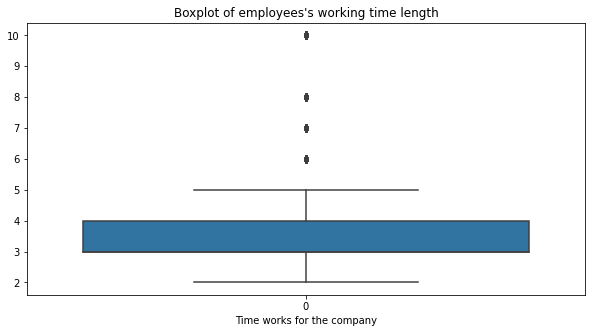

In [13]:
# Create a boxplot to visualize distribution of `time_spend_company` and detect any outliers
### YOUR CODE HERE ###
plt.figure(figsize=(10,5))
sns.boxplot(data= df['time_spend_company'])
plt.xlabel('Time works for the company')
plt.title('Boxplot of employees\'s working time length')
plt.show()

💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




- Around 17% employees left the company. Most left employees has low and medium salary and lack of promotion. Sales department has the highest left employees, followed by tehcnical and support.Satisfaction levels concentrated around 0, 0.4, and 0.8, while last evaluations centered on 0.5 and 0.9. Work accidents are rare and peaked in the third year with two peaks monthly average working hours (150 and 200).The majority who left contributed to 2 projects,  followed by 6 and 5 projects.

- I convert the department and salary from sting into binary values since the planning constructed models cannot understand non-numerical values.

- EDA allows to discover insights by summarizing the characteristics among data through analysis and visualization based on the objective of the project. Additionally, it helps test hypotheses and identifies outliers and important features.

- At this stage, applying seaborn and matplotlib for visualization purposes and pandas for feature transformation by converting categorical features into numerical values.

- There is not any ethical consideration at this stage.

## Step 2. Data Exploration (Continue EDA)

### Data visualizations

In [14]:
#portion of left
df['left'].value_counts(normalize=True)

0    0.833959
1    0.166041
Name: left, dtype: float64

Now, start examining the variables that you're interested in, and create plots to visualize relationships between variables in the data.

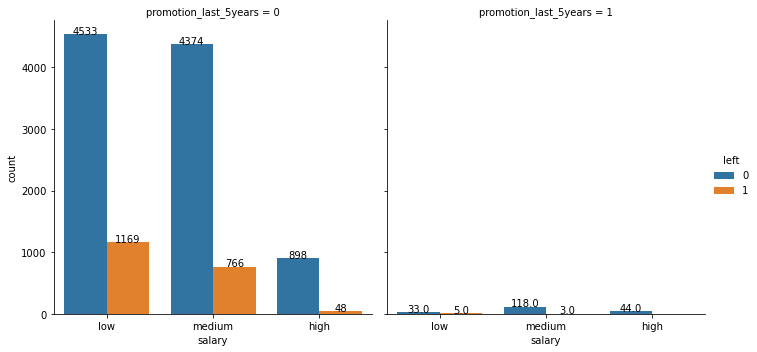

In [15]:
# salary vs left
fig = sns.catplot(
    data = df,
    x = 'salary',
    hue = 'left',
    kind = 'count',
    col = 'promotion_last_5years'
)

# Add value labels to the bars
for ax in fig.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center')

# add labels
plt.show()

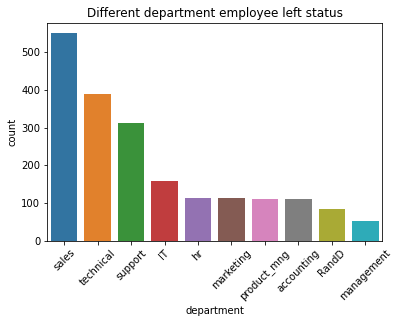

In [16]:
# which departments left the most

# data for left = 1
df_left = df[df['left'] == 1]

#department counts 
depart_counts = df_left['department'].value_counts(ascending=False)
sns.countplot(
    data = df_left,
    x = 'department',
    order = depart_counts.index
)
plt.xticks(rotation = 45)
plt.title("Different department employee left status")
plt.show()

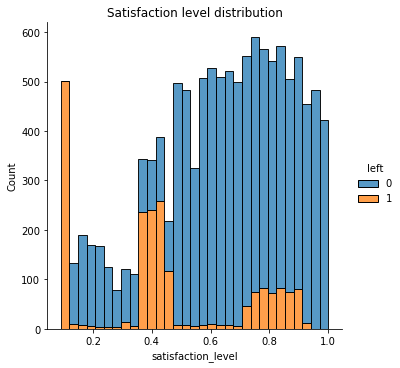

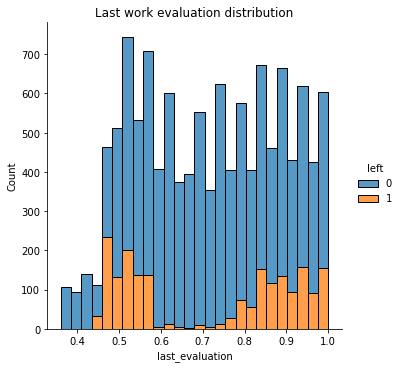

In [17]:
# what is the distribution of satisfaction_level
sns.displot(
    data = df,
    hue = 'left',
    x = 'satisfaction_level',
    multiple="stack"
)
plt.title("Satisfaction level distribution")



# what is the distribution of last_evaluation
sns.displot(
    data = df,
    hue = 'left',
    x = 'last_evaluation',
    multiple = 'stack'
)
plt.title("Last work evaluation distribution")
plt.show()

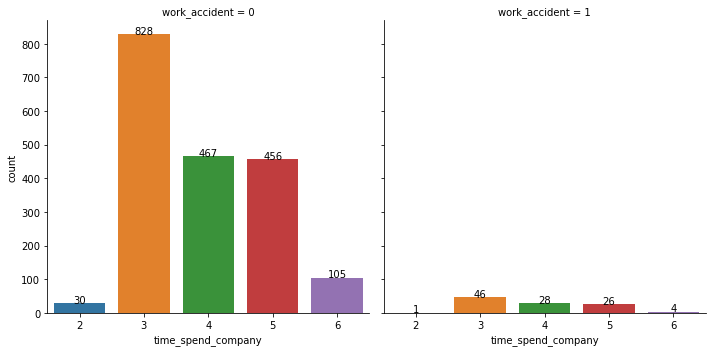

In [18]:
# time_spend_company with work accident
fig1= sns.catplot(
    data = df_left,
    x = 'time_spend_company',
    kind = 'count',
    col = 'work_accident'

)

for ax in fig1.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center')
plt.show()

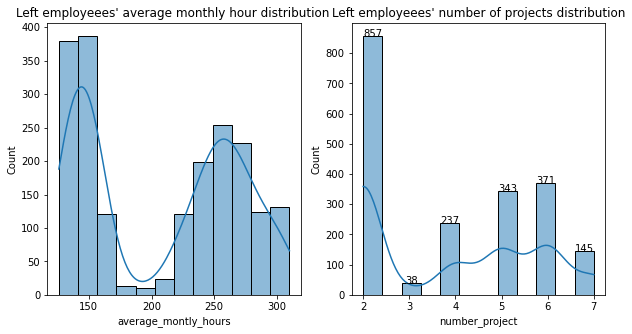

In [19]:
#create subplots
fig3, ax = plt.subplots(1, 2, figsize=(10,5))

#plot average_montly_hours distribution
sns.histplot(
    data = df_left,
    x = 'average_montly_hours',
    kde = True,
    ax = ax[0]
)
#set title
ax[0].set_title("Left employeees' average monthly hour distribution ")

#plot number of project distribution
sns.histplot(
    data = df_left,
    x = 'number_project',
    kde = True,
    ax = ax[1]
)

# show values in 
for p in ax[1].patches:
    ax[1].annotate(f'{int(p.get_height())}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()-2), 
                   ha='center')

#set title
ax[1].set_title("Left employeees' number of projects distribution")

#pad plot and show plots
#plt.tight_layout(pad = 2, h_pad = 2)
plt.show()

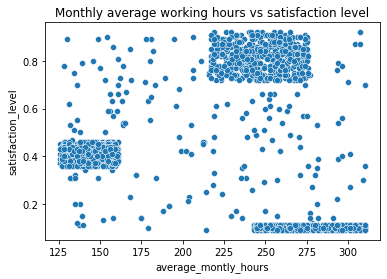

In [20]:
#plot scatter plot between average monthly hours and satisfaction level
sns.scatterplot(
    data = df_left,
    x = 'average_montly_hours',
    y = 'satisfaction_level'
)
plt.title("Monthly average working hours vs satisfaction level")
plt.show()

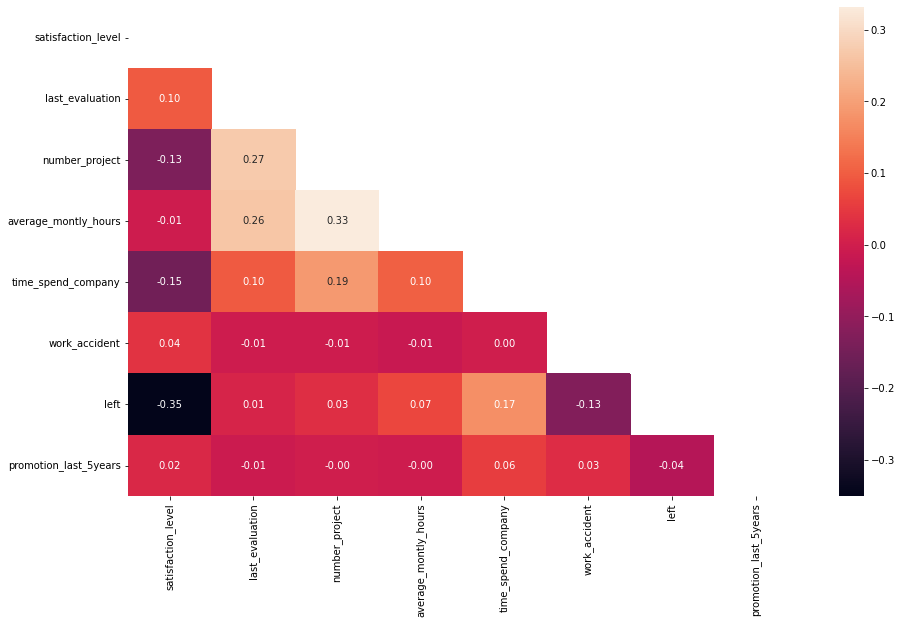

In [21]:
#get mask of lower tri
corr = df.corr()
mask = np.triu(corr)

#create heatmap
plt.figure(figsize=(15,9))
sns.heatmap(corr, mask= mask, annot=True, fmt='.2f')

The heatmap shows for left employees, last_evaluation, number_project, average_month_ours and time_spend_company have positive  correlation, whereas satisfaction_level and work_accident have negative correlation

In [22]:
# the ratio of left employees working over time > 160
print('The portion of working over time for left employees {:.2f}%'.format(
    100* df_left[df_left['average_montly_hours'] > 160].shape[0]/df_left.shape[0]))


# the ratio of current employees working over time > 160

# current employees work over time
mask = (df['left'] == 0) & (df['average_montly_hours'] > 160)
print('The portion of working over time for current employees {:.2f}%'.format(
    100* df[mask].shape[0]/df[df['left'] == 0].shape[0]))

The portion of working over time for left employees 56.50%
The portion of working over time for current employees 75.71%


##### Insights

Based on the 'left' feature, approximately 17% of employees have left the company. 

From a salary perspective, the majority of employees who left the company did not receive a promotion in the last 5 years. Most of these employees belong to the low and medium salary categories. There is a noticeable trend where the number of employees who left the company decreases as salary increases. Surprisingly, even among the employees who received a promotion in the last 5 years, the number of those who left the company is significantly small.

The top three departments with the highest frequency of left employees are sales, technical, and support. Particularly in the sales department, the number of employees who left is more than 500, which is approximately 25% and 50% higher compared to the technical and support departments, respectively.

For employees who left the company, their satisfaction levels are mainly concentrated around 0, 0.4, and 0.8 on a scale of 0 to 1. However, their last evaluation scores are primarily distributed around 0.5 and 0.9 on the same scale.

Considering work performance, the number of employees who left without work accidents (1886) is significantly higher than those with work accidents (105). Interestingly, there is a noticeable pattern in the length of employment with the company for both situations.

The data shows that no employees left in the first year, and the second year has the lowest number of employees leaving. However, there is a critical increase and reaches the peak in the third year. Following by a sharp decrease in the fourth year, which is around 50% lower than the previous year. The attrition rate levels out around the fifth year but experiences another sharp decrease in the sixth year. 

Additionally, there are two prominent peaks in average monthly working hours, occurring at around 150 and 250 hours. The proportion of employees working overtime (160 hours per month) is approximately 56.5% for those who left the company and 75.71% for current employees. In terms of the number of project contributions, the highest number of employees who left the company contributed to 2 projects with more than 800 people. Following by employees who contributed to 6 and 5 projects, which accounts for 371 and 343 people, respectively.

To sum up, around 17% employees left the company. Most left employees has low and medium salary and lack of promotion. Sales department has the highest attrition, followed by tehcnical and support.Satisfaction levels concentrated around 0, 0.4, and 0.8, while last evaluations centered on 0.5 and 0.9. Work accidents are rare and it peaked in the third year with two peaks of monthly average working hours (150 and 200).The majority who left contributed to 2 projects, followed by 6 and 5 projects.

In [23]:
## converting the catrgocial values into binary 
df_final = pd.get_dummies(df, columns=['department','salary'])
df_final.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



- There are no significant changes in the recall, F1 score before and after tuning hyperparameters on three models on testing sets. 
- Since the dataset is not very large, all the data is used for training models. There are 10 different values in departments, and the variation of left employees should be evaluated differently.
- Based on the content of the project, each observation is independent, which met the model assumption.
- Three models have great performance on testing sets, which achieve at least 0.97 accuracy, 0.92 recall, and 0.91 F1 score after tuning models.
- Additional information on last_evaluation and satisfaction_level would be more helpful to identify key factors that impact left employees from different departments.
- Relevant API on sklearn functions and models.
- There are no ethical considerations at this stage.

### Identify the type of prediction task.

This is a classfication problem since the purpose of this project is determining employee left the company or not and then find out features that cause left the company.

### Identify the types of models most appropriate for this task.

Possible models: 
- Randomforest
- XGboosting
- Decision tree

### Modeling

In [24]:
#normalized the value on number_project average_montly_hours time_spend_company between 0 and 1
df_final[['number_project', 'average_montly_hours', 'time_spend_company']] = MinMaxScaler().fit_transform(df_final[['number_project', 'average_montly_hours', 'time_spend_company']])

df_final.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,0.0,0.285047,0.125,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,0.6,0.775701,0.500,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,1.0,0.822430,0.250,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,0.6,0.593458,0.375,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,0.0,0.294393,0.125,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [25]:
#create X and y
y = df_final['left']
X = df_final.drop(columns='left')

# train sets
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.4, random_state=42)

X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5, random_state= 42)

In [26]:
# without tuning models for RandomForst and xgboosting
rf = RandomForestClassifier(random_state= 1, n_jobs= -1)
xgb = XGBClassifier(random_state =1, n_jobs = -1)
dt = DecisionTreeClassifier(random_state= 1)

In [27]:
%%time
# fit the data with rf and make the prediction
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

CPU times: user 700 ms, sys: 22.4 ms, total: 723 ms
Wall time: 553 ms


In [28]:
%time
# fit the data with xgb and make the prediction
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs


In [29]:
%%time
dt.fit(X_train, y_train)
dt_pred =dt.predict(X_test)

CPU times: user 25.2 ms, sys: 131 µs, total: 25.3 ms
Wall time: 23.8 ms


In [30]:
def get_test_scores(model_name:str, preds, y_test_data):
  '''
  Generate a table of test scores.

  In: 
    model_name (string): Your choice
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

  Out: 
    table: A pandas df of precision, recall, f1, and accuracy scores for your model
  '''

  #create empty datframe
  table = pd.DataFrame()

  # recall
  recall = recall_score(y_test_data, preds)

  #precision
  precision = precision_score(y_test_data, preds)

  #f1
  f1 = f1_score(y_test_data, preds)

  # accuracy
  accuracy = accuracy_score(y_test_data, preds)
  
  table = table.append({
      
      "model" : model_name,
      "precision": precision,
      "recall" : recall,
      "f1" : f1,
      "accuracy": accuracy
      
  },
    ignore_index=True)
  return table

In [31]:
#get test scores of each model
rf_scores = get_test_scores("Random Forest", rf_pred, y_test)
xgb_scores = get_test_scores("XGBoosting", xgb_pred, y_test)
dt_scores = get_test_scores("Decision Tree", dt_pred, y_test)

# merge these table as one
scores = pd.concat([rf_scores, xgb_scores, dt_scores])
scores

,model,precision,recall,f1,accuracy
0,Random Forest,0.975936,0.921717,0.948052,0.983326
0,XGBoosting,0.968338,0.926768,0.947097,0.982910
0,Decision Tree,0.912500,0.921717,0.917085,0.972489


Random Forest confusion matrix


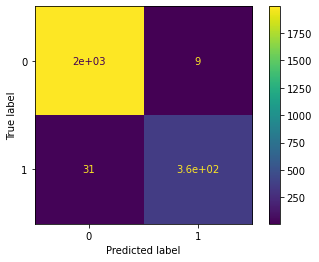

XGBoosting confusion matrix


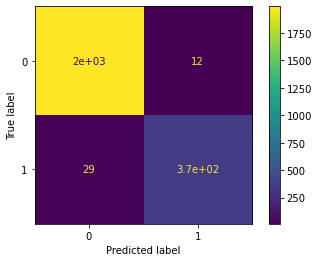

Decision Tree confusion matrix


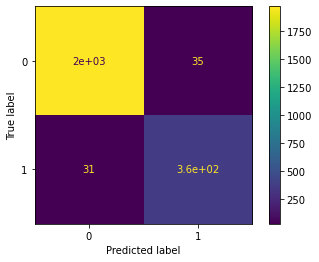

In [32]:
#create a dictionary with model name and its prediction
model_dict = {
    'Random Forest': rf_pred,
    'XGBoosting': xgb_pred,
    'Decision Tree': dt_pred
}

#loop through model_dic and plot confusion matrix
for k,v in model_dict.items():
    print("{} confusion matrix".format(k))
    conf = confusion_matrix(y_test, v)
    fig = ConfusionMatrixDisplay(conf, rf.classes_)
    fig.plot()
    plt.show()

True negative(TN): the model correctly predicts the employee stays in the company

True positive(TP): the model correctly predicts the employee left with the company

False negative(FN): the model predicts the employee stay but actually left the company

False positive(FP): the model predicts the employee left but actually stay with the company

For this project, we are more interested in False negative, since the model is to predict left employees in the company. We would like to minimize the value of the wrong prediction of staying employees but actually left, which refers to recall defined as TP/(TP+FN). All three models have similar scores on recall and a high accuracy rate with good scores of f1. Let's try tuning hyperparameters of models if there are any improvements.

In [33]:
#tuning hyperparamters of decision tree
tree_param = {
    
    'max_depth':[4, 5,'None'],
    'min_samples_split': [2,3,4],
    'min_samples_leaf':[2,3,4]
}

#dictionary for evaluation metric
scoring = {'f1', 'recall', 'precision', 'accuracy'}

#create customized cv for tree
cv_tree = GridSearchCV(estimator=dt, param_grid= tree_param, scoring=scoring, cv =5, refit='recall')


In [34]:
%time
#fit cv_tree
cv_tree.fit(X_train, y_train)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.87 µs


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=1, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 5, 'None'],
                         'min_samples_leaf': [2, 3, 4],
                 

In [35]:
#find the best score 
cv_tree.best_score_

0.920675105485232

In [36]:
#find the best parameters
cv_tree.best_params_

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [37]:
#tuning random forest
rf_params = {
    'n_estimators':[50, 75, 100, 150],
    'min_samples_split': [2,3,4],
    'min_samples_leaf':[2,3,4],
     'max_features' : ['sqrt', None]
    
}

cv_rf = GridSearchCV(estimator= rf, param_grid= rf_params, scoring=scoring, cv =5, refit="recall" , n_jobs=-1, verbose=1)

In [38]:
%time
#fit cv_rf
cv_rf.fit(X_train, y_train)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 10 µs
Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   53.8s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  2.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=1,
                                     

In [39]:
#find the best score 
cv_rf.best_score_

0.9147679324894515

In [40]:
#find the best parameters
cv_rf.best_params_

{'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 50}

In [41]:
#tuning xgb
xgb_params = {
    'n_estimators':[100, 150, 200, 250],
    'learning_rate': [0.01, 0.1, 0.2],
    'colsample_bytree':[0.3, 0.5, 0.7 ],
     'max_depth' : [3,4,5]
    
}

cv_xgb = GridSearchCV(estimator=xgb , param_grid= xgb_params, scoring=scoring, cv =5, refit="recall" , n_jobs=-1, verbose=1)

In [42]:
%time
#fit cv_xgb
cv_xgb.fit(X_train, y_train)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs
Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  3.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, ma...
                                     objective='binary:logistic',
                                     predictor='auto', random_state=1,
                                     reg_alpha=0, ...),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.

In [43]:
#find the best score 
cv_xgb.best_score_

0.9240506329113923

In [44]:
#find the best parameters
cv_xgb.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 200}

In [45]:
#get the predictions of each model with the best cv parameters
best_dt_pred = cv_tree.best_estimator_.predict(X_test)
best_rf_pred = cv_rf.best_estimator_.predict(X_test)
best_xgb_pred = cv_xgb.best_estimator_.predict(X_test)

# get relevant socre
tuned_rf_scores = get_test_scores("Tuned Random Forest", best_dt_pred, y_test)
tuned_xgb_scores = get_test_scores("Tuned XGBoosting", best_xgb_pred, y_test)
tuned_dt_scores = get_test_scores("Tuned Decision Tree", best_dt_pred, y_test)

#combine these scores 
scores = pd.concat([scores, tuned_rf_scores, tuned_xgb_scores, tuned_dt_scores])
scores

,model,precision,recall,f1,accuracy
0,Random Forest,0.975936,0.921717,0.948052,0.983326
0,XGBoosting,0.968338,0.926768,0.947097,0.982910
0,Decision Tree,0.912500,0.921717,0.917085,0.972489
0,Tuned Random Forest,0.901720,0.926768,0.914072,0.971238
0,Tuned XGBoosting,0.968586,0.934343,0.951157,0.984160
0,Tuned Decision Tree,0.901720,0.926768,0.914072,0.971238


In [46]:
# validate the tuned model
rf_valid_pred = cv_rf.best_estimator_.predict(X_valid)
xgb_valid_pred = cv_xgb.best_estimator_.predict(X_valid)
dt_valid_pred = cv_tree.best_estimator_.predict(X_valid)



#get valid scores of each tuned model
rf_scores_valid = get_test_scores("Tuned Random Forest", rf_valid_pred, y_valid)
xgb_scores_valid = get_test_scores("Tuned XGBoosting", xgb_valid_pred, y_valid)
dt_scores_valid = get_test_scores("Tuned Decision Tree", dt_valid_pred, y_valid)


# merge these table as one
scores_valid = pd.concat([rf_scores_valid, xgb_scores_valid, dt_scores_valid])
scores_valid

,model,precision,recall,f1,accuracy
0,Tuned Random Forest,0.989247,0.897561,0.941176,0.980817
0,Tuned XGBoosting,0.965969,0.900000,0.931818,0.977481
0,Tuned Decision Tree,0.899015,0.890244,0.894608,0.964137


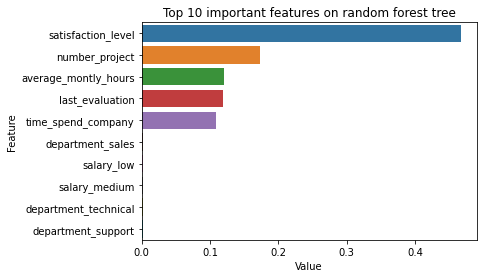

In [47]:
rf_df = pd.DataFrame({"Feature": X.columns, "Value" :cv_rf.best_estimator_.feature_importances_})
sns.barplot(
    data =rf_df.sort_values(by='Value', ascending =False)[:10],
    y = "Feature",
    x = "Value",
    orient= "h"
)
plt.title("Top 10 important features on random forest tree")
plt.show()

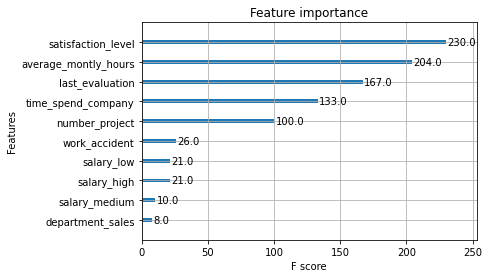

In [48]:
#check important features of xgb
plot_importance(cv_xgb.best_estimator_, max_num_features=10)
plt.show()

💭 
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How? 
- Given what you know about the data and the models you were using, what other questions could you address for the team? 
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?

- XGBoosting and randomforest show the same top 5 features with different sequences on satisfaction_level, average_monthly_hours, last_evaluation, and number_project. These features would be beneficial for the HR team to review and investigate the reason of left employees in different departments.
- The company should spend resources to improve on working culture and HR policies on work-life balance. At least half of the left employees work overtime without any promotion in the last 5 years. There is a high chance that employees quit their job if they work more than 250 hours on average per month without recognizing the value of work effort due to low satisfaction levels.
- The feedback on working culture from employees is essential to develop a better company policy on work-life balance culture. Updating relevant policies and reward systems to evaluate and compare the same metric if there are any improvements on fewer left employees.
- The information on measuring satisfaction levels and the last evaluation on work performance would be helpful for model improvements to identify factors on left employees and develop better working culture.
- How often the company collects feedback from employees on working culture? How is satisfaction/evaluation measured? Why do some departments tend to work overtime? How does the company help employees who work overtime with a performance less than average? What is the current policy of HR on employees' work-life balance?
- The sklearn API on models and functions.
- Every department has different status on left employees. The HR policy should be regularly updated based on department situations.

### Summary of model results
There is a slight improvement in tree-based models based on recall evaluation after tuning models. These models are decision tree, random forest, and xgboosting that achieve at least 0.97 accuracy, 0.92 recall, and 0.91 f1 scores. XGBoosting performs the best on testing datasets among models. After validating three models, XGBoosting has a marginally higher value of recall than the other two models, which have around 0.93 f1 score, 0.98 accuracy, and 0.90 recall.

Comparing important features between random forest and xgboosting, these two models show the same top 5 features with different orders. These features are satisfaction_level, average_monthly_hours, last_evaluation, and number_project.Even though we do not know how the two models come out with these important features exactly, these features are essential references for the HR department to do further investigation to reduce the number of left employees and promote better working culture and policies.

### Conclusion, Recommendations, Next Steps

- XGBoosting and randomforest tree perform well on both testing and validation sets.Recall and accuracy and F1 score are high. The model can successfully classify left employees.

- Both models show the same top 5 important features, satisfaction_level, average_monthly_hours, last_evaluation, and number_project. Additional information on satisfaction level and last evaluation would be more helpful to get to know more insights into what factors to determine employees' left.